# General Setup (Mapping)

In [ ]:
# Import the geopandas and geoplot libraries
!pip install geopandas
!pip install geoplot

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import geoplot as gplt
import seaborn as sns

# Set up the color scheme:
import mapclassify as mc

In [ ]:
# Load the json file with coordinates
geo_data = gpd.read_file("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/neighbourhoods.geojson")

# Basic plot with just outlines
gplt.polyplot(
    geo_data,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(16, 12)
)


In [ ]:
def choropleth_quick_plot(geo_data, data, left_col, right_col, display_col, colour_scheme):
  # Show the distribution
  fullData = geo_data.merge(data, left_on=[left_col], right_on=[right_col])
  #fullData.head(2)

  # Initialize the figure
  scheme = mc.Quantiles(fullData[display_col], k=20)

  # Map
  gplt.choropleth(fullData,
      projection=gcrs.AlbersEqualArea(),
      hue=display_col,
      linewidth=.1,
      figsize=(16, 12),
      scheme=scheme,
      cmap=colour_scheme,
      legend=True,
  );

# Regresssion

These are libraries that are required for regression.

In [ ]:
#Libraries for regression
import statsmodels.api as sm


We will be covering single variation OLS regression, muliple regression, Lasso, and Elastic regession.

## Regression of Median Commute Duration

We will import and clean the data and make a heatmap. We will create scatter plots of % driver vs % using public transit, %  walking vs commute duration, the population vs commute duration. Final we will do a multiple regression of Commute duration and will map the results.

In [ ]:
#import info
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/C1_Toronto_Neighborhoods/walk_transit_bike.csv", encoding='utf-8')
data.drop(index=data.index[0], axis=0, inplace=True)
#data.drop(index=data.index[11], axis=0, inplace=True)
print(data)
data = data.dropna()

#clean data
#dfObj = pd.concat([data["mmcom_driver"], data["mmcom_pass"], data["mmcom_public"], data["mmcom_walk"], data["mmcom_bike"],data["mmcom_other"],data["comu_dur_median"], data["pop_2011"].astype(float)],axis=1)
data["drivertopublic"] = data["mmcom_driver"] / data["mmcom_public"]
data["pop_2011"] = data["pop_2011"].astype(float)

# data heat map
corrMatrix = data.corr()
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corrMatrix, annot = True, fmt = '.2f')
plt.show()
#sns.heatmap(corrMatrix, annot=True)

In [ ]:
#driver vs public transit correlation---------------

#plot
x = data["mmcom_driver"]
y = data["mmcom_public"]
plt.plot(x, y, "o", color='black');
plt.title("amount of drivers vs amount taking buses/trains")
plt.show()
plt.clf()

#correlation
Y = data['mmcom_driver']
X = data["mmcom_public"]
X.head()
X = sm.add_constant(X)
X.head()
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())


In [ ]:
# percent of walk vs commute duration correlation---------------

#plot
x = data["mmcom_walk"]
y = data["comu_dur_median"]
plt.plot(x, y, "o", color='black');
plt.title("amount of walkin vs commute timing")
plt.show()
plt.clf()

#correlation
Y = data['comu_dur_median']
X = data["mmcom_walk"]
X.head()
X = sm.add_constant(X)
X.head()
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

In [ ]:
#population vs commute duration correlation---------------

#plot
x = data["pop_2011"].astype(float)
y = data["comu_dur_median"]
plt.plot(x, y, "o", color='black');
plt.title("amount of popul vs commute timing")
plt.show()
plt.clf()

#correlation
Y = data['comu_dur_median']
X = data["pop_2011"]
X.head()
X = sm.add_constant(X)
X.head()
model = sm.OLS(Y, X.astype(float), missing='drop')
model_result = model.fit()
print(model_result.summary())


In [ ]:
#multiple linear regression
#-----------------------------------------------------------------------------------------------

# data cleaning
Y = data['comu_dur_median']
data1 = data.drop(columns=['comu_dur_median',"ttc_overcrowded_routes"])
data1 = data1.drop(columns=['name'])

# graph
X = data1
X = sm.add_constant(X)
print(X)
ks = sm.OLS(Y, X.astype(float))
ks_res =ks.fit()
print(ks_res.summary())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,neighbourhood,neighbourhood_group,geometry,name,pop_2011,mmcom_driver,mmcom_pass,mmcom_public,mmcom_walk,mmcom_bike,...,dwtype_house,dwtype_apmt,dwtype_other,dw_age_1960,dw_age_1980,dw_age_1990,dw_age_2000,dw_age_2005,dw_age_2011,pop_den
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",York University Heights,27713,0.503903,0.047702,0.379879,0.054640,0.004770,...,0.14445,0.492002,0.365487,0.145005,0.536857,0.138215,0.050921,0.042677,0.083899,2094.708995
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...",The Beaches,21130,0.534672,0.046389,0.298900,0.064562,0.033955,...,0.28145,0.067697,0.651919,0.716418,0.086354,0.033049,0.052239,0.075160,0.034115,5935.393258


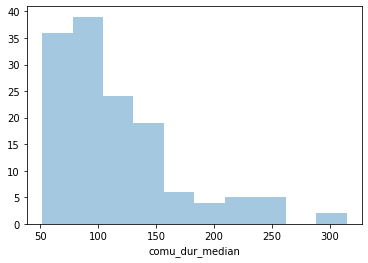

In [ ]:
# Read file
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/C1_Toronto_Neighborhoods/walk_transit_bike.csv", encoding='utf-8')
data = data.iloc[1: , :]
data  = data.dropna()

# data1 = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/16.csv", encoding='utf-8')
# data1 = data1.iloc[1: , :]
# #data1['name']

# data1['final_manhattan'] = data['final']
# data1['final_manhattan_pop'] = data['final_popd']


choropleth_quick_plot(geo_data, data, 'neighbourhood','name', "comu_dur_median", 'inferno_r')

# # Show the distribution of unemployment rate
# sns.distplot( data["comu_dur_median"], hist=True, kde=False, rug=False );

# fullData = geoData.merge(data, left_on=['neighbourhood'], right_on=['name'])

# fullData.head(2)

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


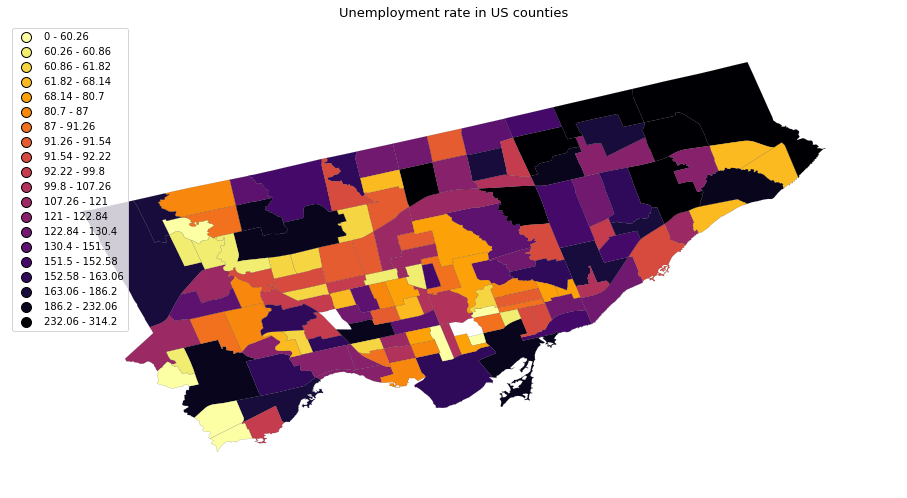

In [ ]:
# # Initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData['comu_dur_median'], k=20)



# # manhattan distance metrics
# # Map
# gplt.choropleth(fullData,
#     hue="comu_dur_median",
#     linewidth=.1,
#     scheme=scheme, cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );

# ax.set_title('Unemployment rate in US counties', fontsize=13);

For regression of median commute duration, Based on the single regression we can say.... Combining the power of many single regressions, we made our multiple regression which has accuracy of ...

## Regression of Walk Score

We will import and clean the data, perform a linear regression of this data and plot the results

In [ ]:
# import info
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/C1_Toronto_Neighborhoods/walk_transit_bike.csv", encoding='utf-8')
data.drop(index=data.index[0], axis=0, inplace=True)
#data.drop(index=data.index[11], axis=0, inplace=True)
print(data)
data = data.dropna()

#clean / plot data
#dfObj = pd.concat([data["mmcom_driver"], data["mmcom_pass"], data["mmcom_public"], data["mmcom_walk"], data["mmcom_bike"],data["mmcom_other"],data["comu_dur_median"], data["pop_2011"].astype(float)],axis=1)
data["drivertopublic"] = data["mmcom_driver"] / data["mmcom_public"]
data["pop_2011"] = data["pop_2011"].astype(float)
sns.pairplot(data)

In [ ]:
#import info
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/C1_Toronto_Neighborhoods/walk_transit_bike.csv", encoding='utf-8')
data.drop(index=data.index[0], axis=0, inplace=True)
#data.drop(index=data.index[11], axis=0, inplace=True)
#print(data)
data = data.dropna()

# cleaning data
#dfObj = pd.concat([data["mmcom_driver"], data["mmcom_pass"], data["mmcom_public"], data["mmcom_walk"], data["mmcom_bike"],data["mmcom_other"],data["comu_dur_median"], data["pop_2011"].astype(float)],axis=1)
data["drivertopublic"] = data["mmcom_driver"] / data["mmcom_public"]
data["pop_2011"] = data["pop_2011"].astype(float)
data = data.drop(columns=["ttc_overcrowded_routes"] )
data9 = data

#pair plt walk score
sns.pairplot(data=data, x_vars=data.head(0), y_vars=['walk_score'])

# multiple linear regression

#regression
Y = data['walk_score']
data1 = data.drop(columns=['walk_score'])
data1 = data1.drop(columns=['name'])
X = data1
X = sm.add_constant(X)
#print(X)
ks = sm.OLS(Y, X.astype(float))
ks_res =ks.fit()
print(ks_res.summary())



In [ ]:
#pair plt walkscore kernal plot
sns.pairplot(data = data, y_vars=['walk_score'], kind="kde")


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


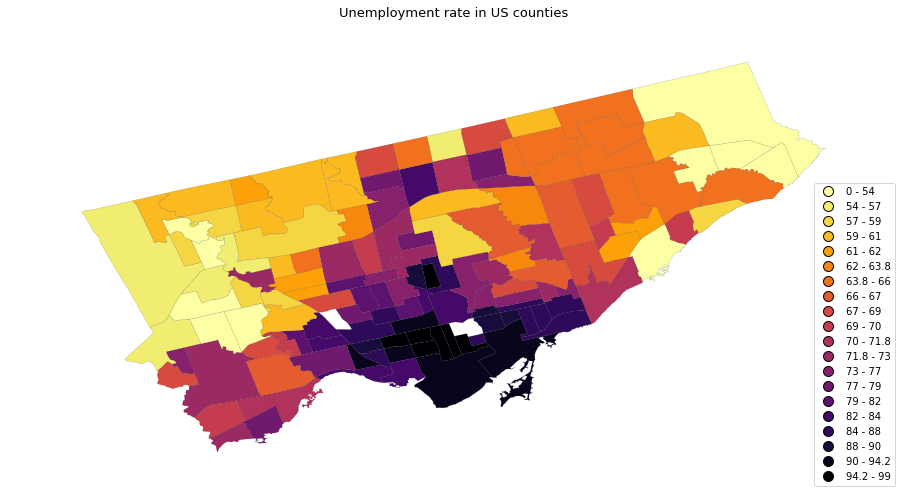

In [ ]:
choropleth_quick_plot(geo_data, data, 'neighbourhood','name', 'walk_score', 'inferno_r')


# # Initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData['walk_score'], k=20)



# # manhattan distance metrics
# # Map
# gplt.choropleth(fullData,
#     hue="walk_score",
#     linewidth=.1,
#     scheme=scheme, cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );

# ax.set_title('Unemployment rate in US counties', fontsize=13);

For regression of walk score, based on the single regression we can say.... Combining the power of many single regressions, we made our multiple regression which has accuracy of ...

## Regression of Neighbourhood Equity Score

We will load and clean the data,  graph a pair plot of it,  nd plot a map of the results. Finally, We will plot correlations of increasing household income with the neighbourhood equity score

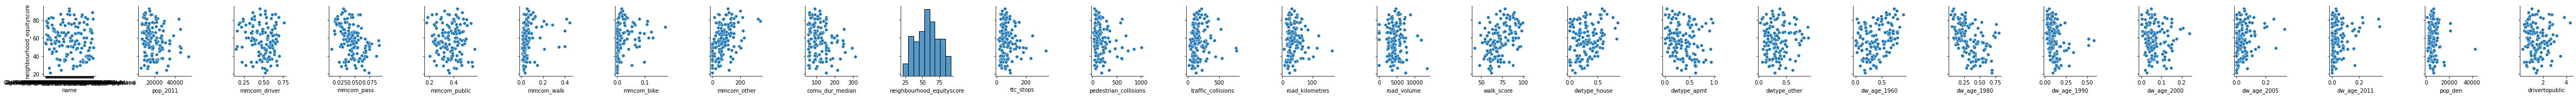

In [ ]:
# pair  pltneighborhood equity score
sns.pairplot(data=data9,x_vars=data.head(0), y_vars=['neighbourhood_equityscore'])

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


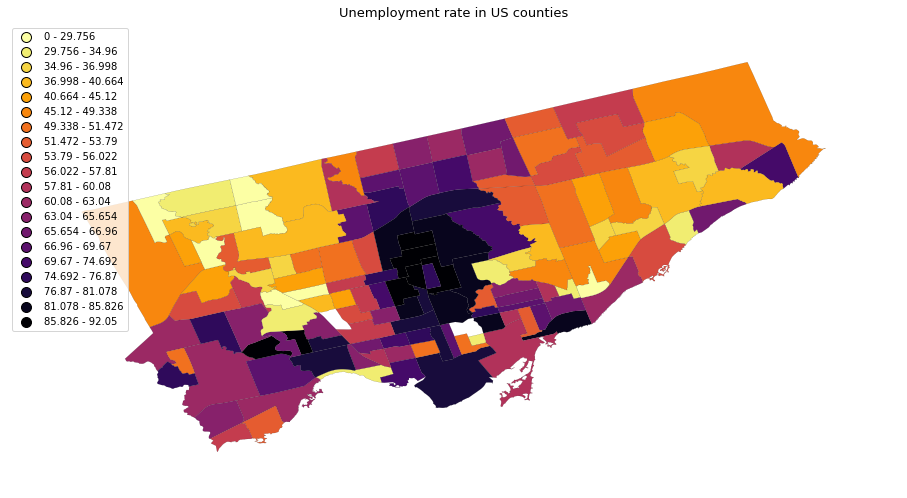

In [ ]:
choropleth_quick_plot(geo_data, data, 'neighbourhood','name', 'neighbourhood_equityscore', 'inferno_r')

# # Initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData['neighbourhood_equityscore'], k=20)

# # manhattan distance metrics
# # Map
# gplt.choropleth(fullData,
#     hue="neighbourhood_equityscore",
#     linewidth=.1,
#     scheme=scheme, cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );

# ax.set_title('Unemployment rate in US counties', fontsize=13);

                             name pop_2011  mmcom_driver  mmcom_pass  \
1                 Agincourt North    30279      0.603758    0.073571   
2    Agincourt South-Malvern West    21988      0.598374    0.078591   
3                       Alderwood    11904      0.667231    0.043184   
4                           Annex    29177      0.236878    0.016229   
5               Banbury-Don Mills    26918      0.637377    0.055722   
..                            ...      ...           ...         ...   
136                      Wychwood    13986      0.340622    0.033642   
137                Yonge-Eglinton    10578      0.362197    0.028864   
138                Yonge-St.Clair    11652      0.348485    0.020734   
139       York University Heights    27713      0.503903    0.047702   
140            Yorkdale-Glen Park    14687      0.480342    0.054701   

     mmcom_public  mmcom_walk  mmcom_bike  mmcom_other  comu_dur_median  \
1        0.279088    0.033587    0.001599         60.0      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


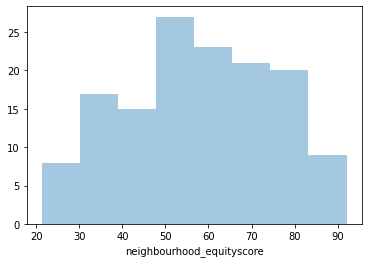

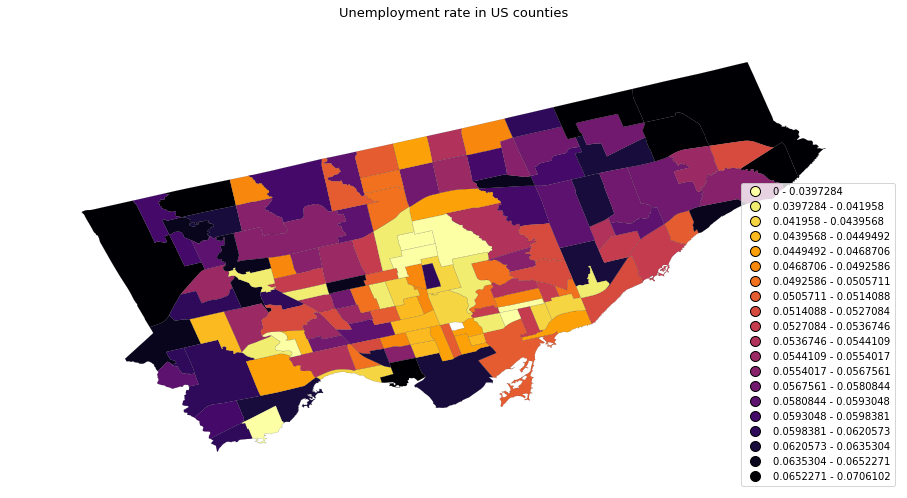

In [ ]:

# Read file
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/C1_Toronto_Neighborhoods/walk_transit_bike.csv", encoding='utf-8')
data = data.iloc[1: , :]
data  = data.dropna()

data1 = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/neighbourhood.csv", encoding='utf-8')
data1 = data1.iloc[1: , :]
data1['name']

#data['name'] = data1['name']

data1['neighbourhood_equityscore'] = data['neighbourhood_equityscore']
print(data)

choropleth_quick_plot(geo_data, data1, 'neighbourhood','name', 'ih_hh_90K_perc', 'inferno_r')
# # Show the distribution of unemployment rate
# sns.distplot( data1["neighbourhood_equityscore"], hist=True, kde=False, rug=False );

# fullData = geoData.merge(data1, left_on=['neighbourhood'], right_on=['name'])
# fullData.head(2)

# # Initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData['ih_hh_90K_perc'], k=20)

# # Map
# gplt.choropleth(fullData,
#     hue="ih_hh_90K_perc",
#     linewidth=.1,
#     scheme=scheme, cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# );

# ax.set_title('Unemployment rate in US counties', fontsize=13);

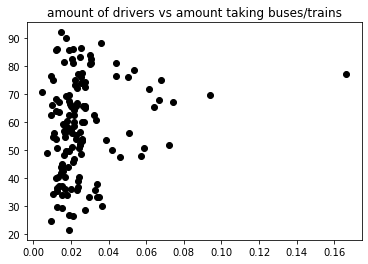

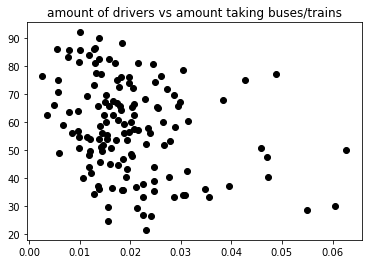

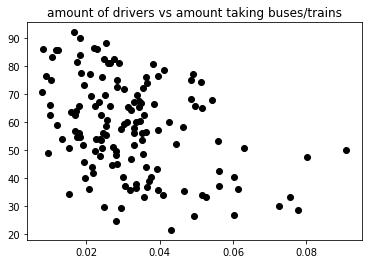

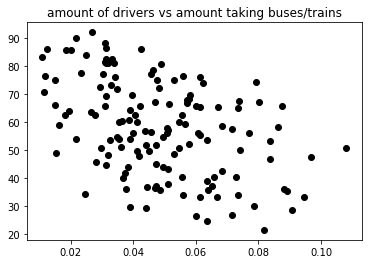

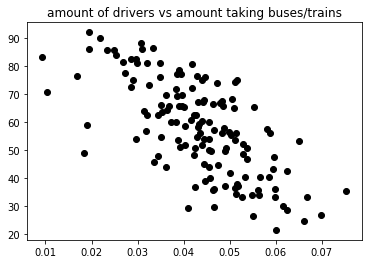

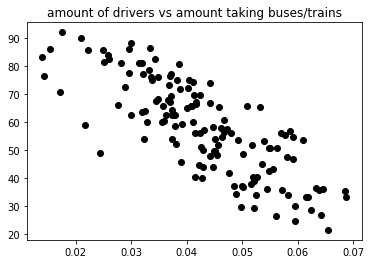

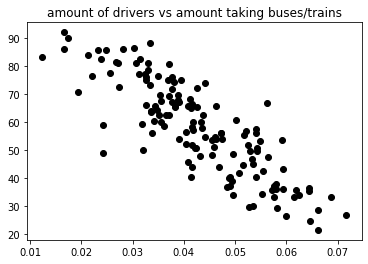

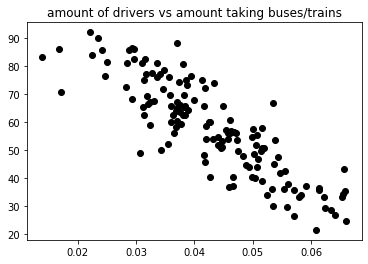

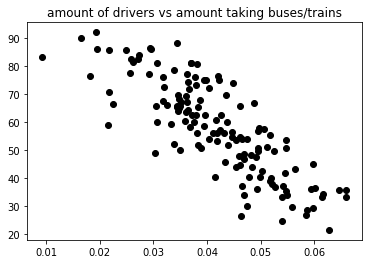

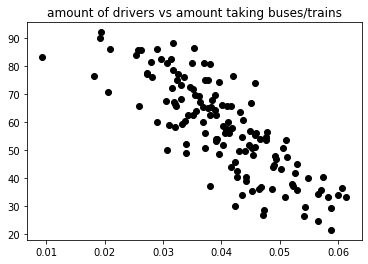

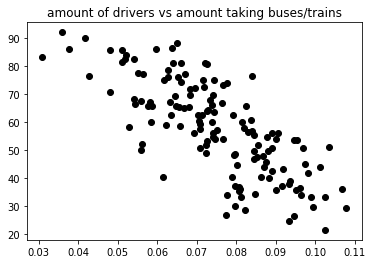

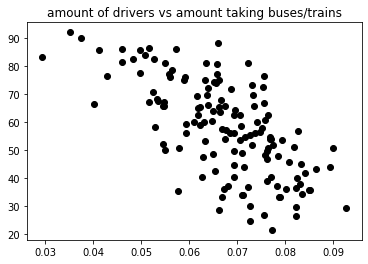

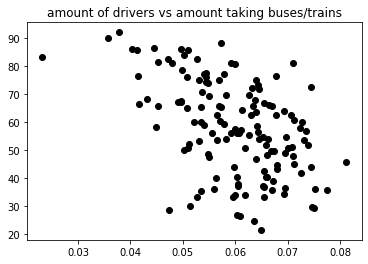

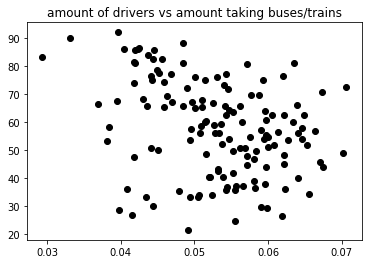

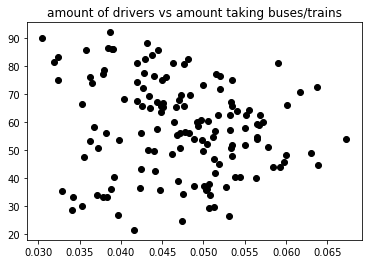

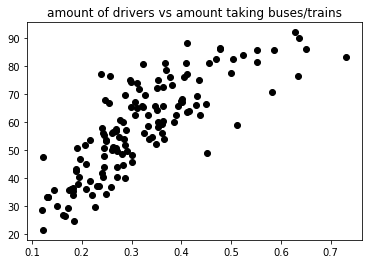

<Figure size 432x288 with 0 Axes>

In [ ]:
# #plot
# a = ['ih_hh_5K_perc',	'ih_hh_10K_perc', 'ih_hh_15K_perc',	'ih_hh_20K_perc',	'ih_hh_25K_perc',	'ih_hh_30K_perc', 'ih_hh_35K_perc',	'ih_hh_40K_perc',	'ih_hh_45K_perc',	'ih_hh_50K_perc',	'ih_hh_60K_perc',	'ih_hh_70K_perc',	'ih_hh_80K_perc',	'ih_hh_90K_perc',	'ih_hh_100K_perc',	'ih_hh_100K_over_perc']

# for counter in range(len(a)):
#  # x = data1["ih_hh_100K_over_perc"]
#   x = data1[a[counter]]


#   y = data1["neighbourhood_equityscore"]
#   plt.plot(x, y, "o", color='black');
#   plt.title("amount of drivers vs amount taking buses/trains")
#   plt.show()
#   plt.clf()


For regression of the neighbourhood equity score, based on the single regression we can say.... Combining the power of many single regressions, we made our multiple regression which has accuracy of .... We can see that as the income threshold increases, the correlation with neighbourhood equity score becomes more strongly negtive until high threhold when the thresholdcorrelation becomes less strong.